In [104]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame,Series
import sys
import matplotlib.pyplot as plt

dataSource = pd.read_csv('./data.csv', encoding = 'gbk', index_col=0)
dataSource.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4754 entries, 5 to 11992
Data columns (total 89 columns):
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility                             4752 non-null float64
student_featur

#数据类型包括类型、文本类型和字符类型

In [105]:
dataSource.describe()

,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,4752.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,21.751263,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,16.474916,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,12.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,17.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,27.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,234.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


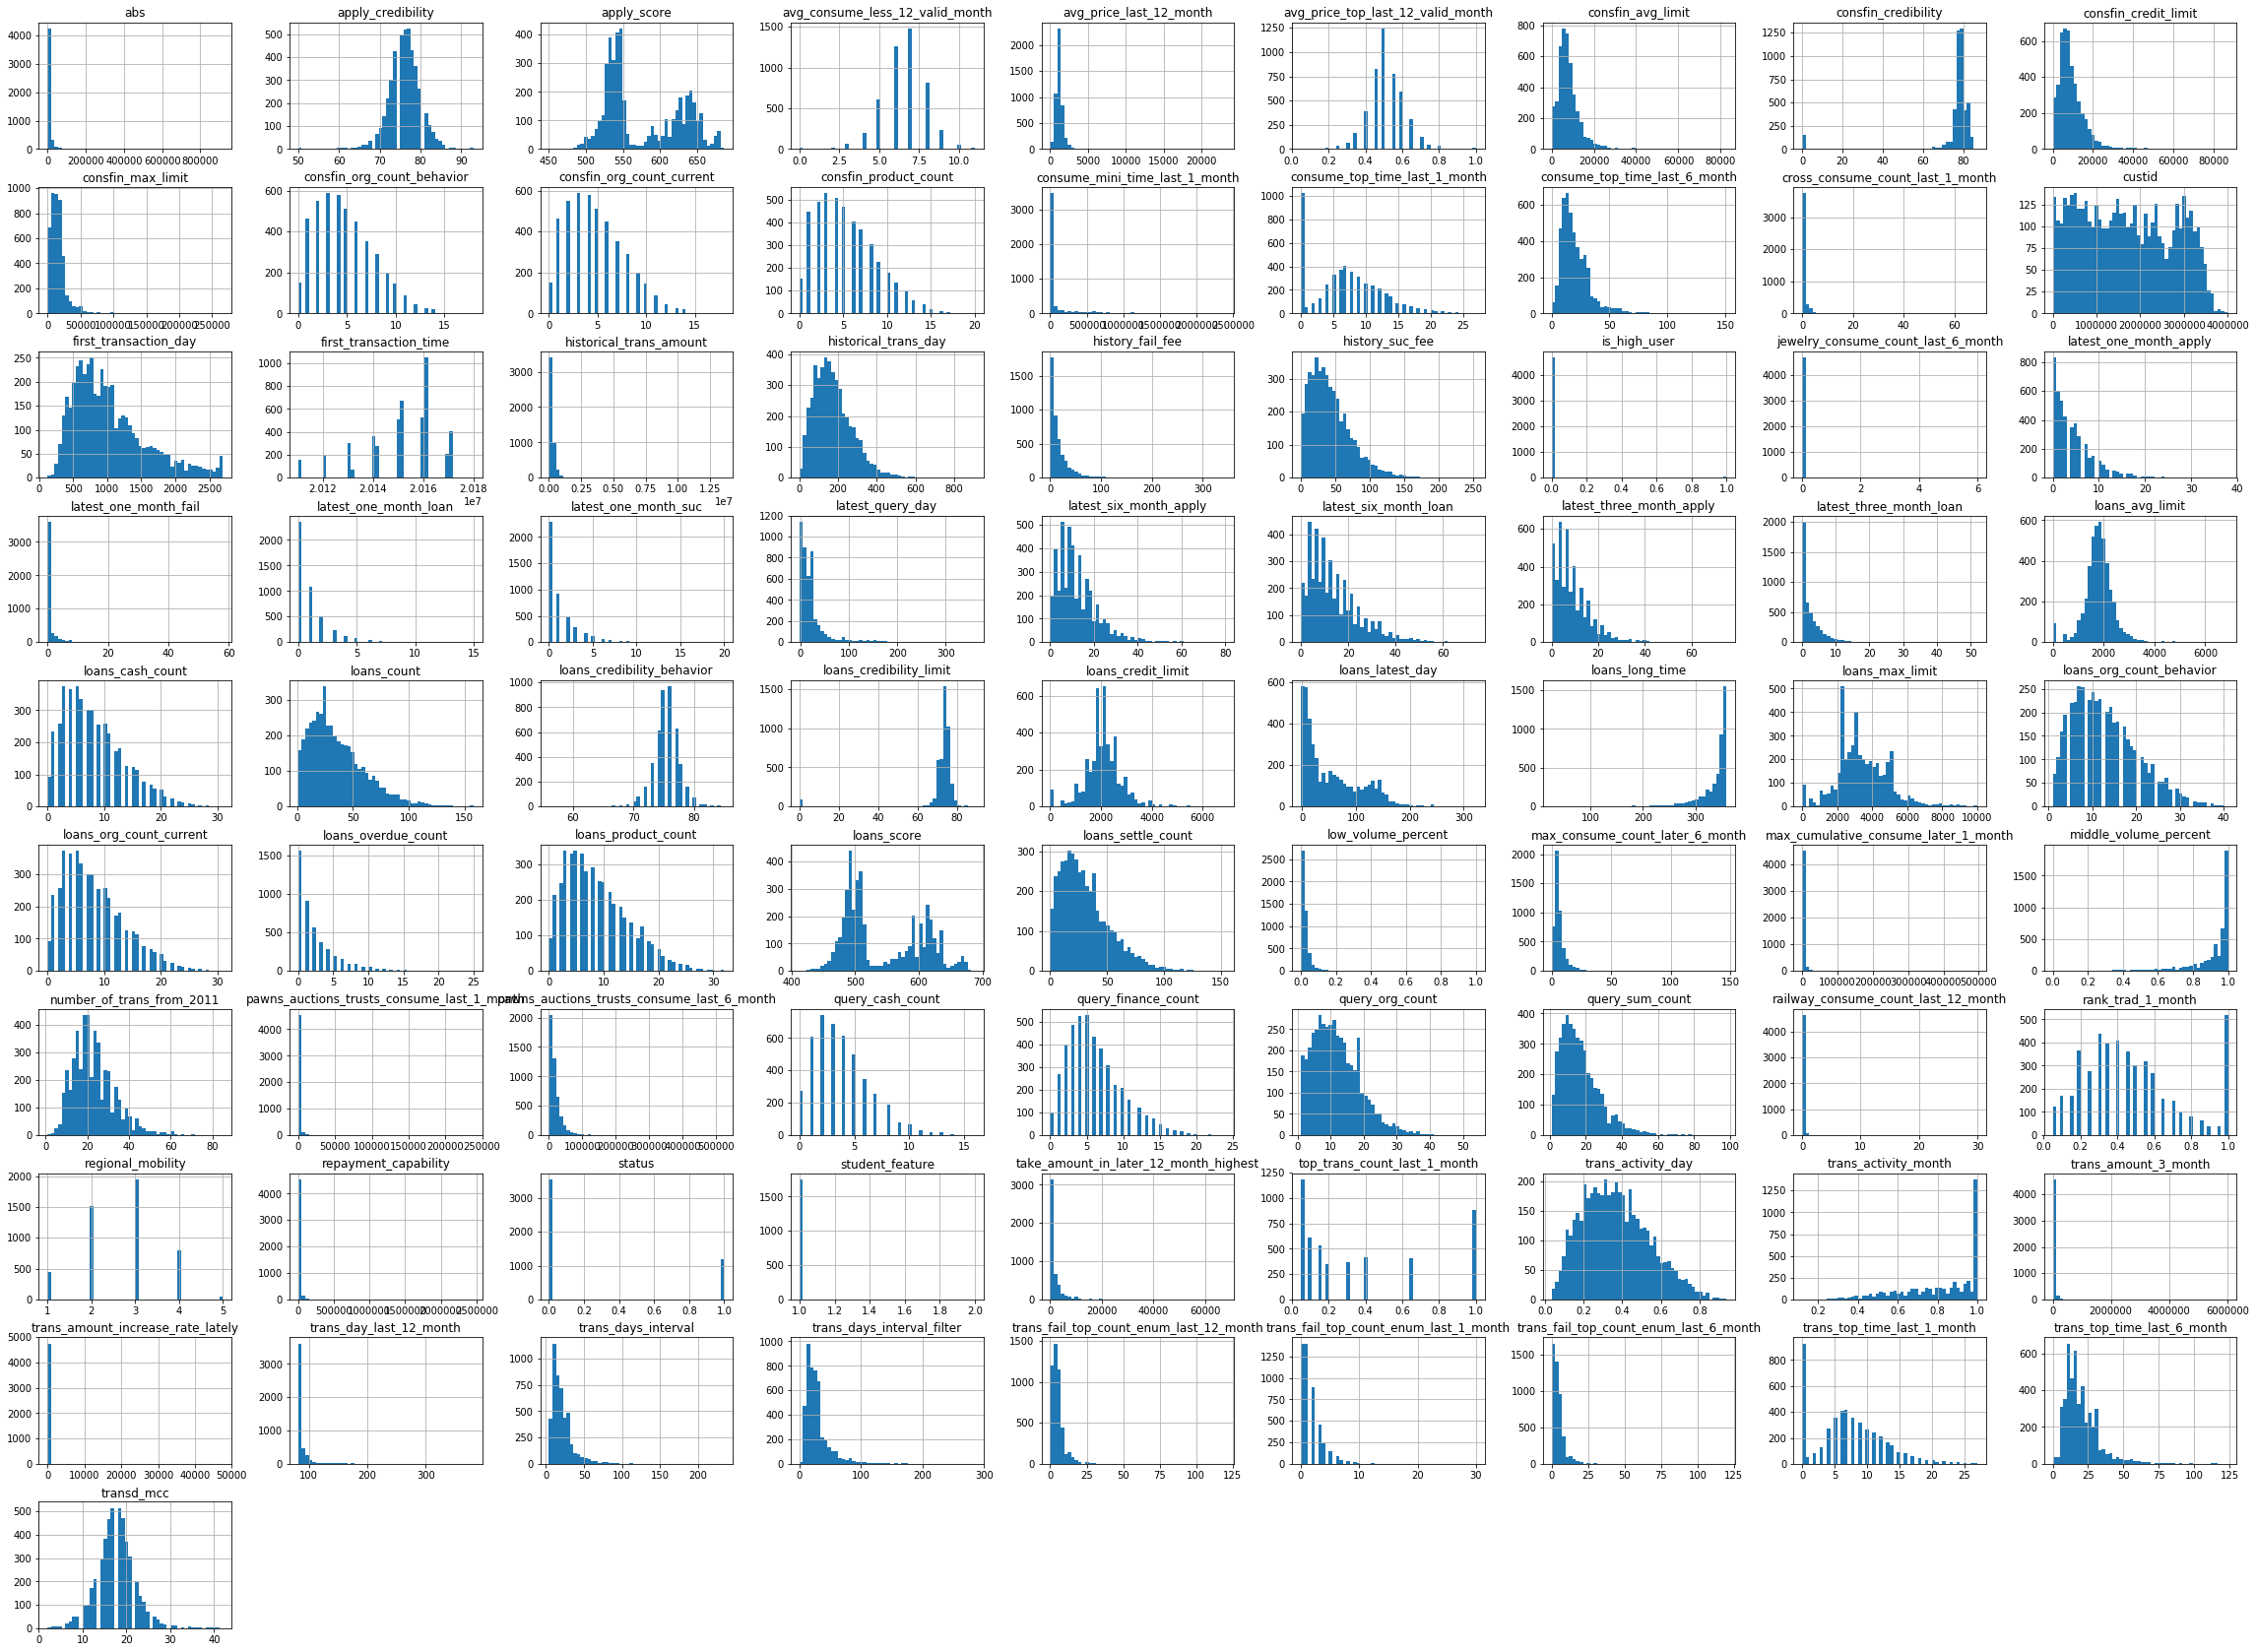

In [106]:
dataSource.hist(bins=50, figsize=(40,30))
plt.show()

## 特征处理
- 删除无效的特征
- 处理缺失值
- 文本类型的数据处理

In [107]:
import numpy as np
# 删除所有id_name= NA的行
dataSource = dataSource[pd.notnull(dataSource['id_name'])]
dataSource['id_name']

5          蒋红
10        崔向朝
12        王中云
13        何洋洋
14         赵洋
15         刘成
16        周雨浓
20        周琰龙
26        马晓辉
28        冯子涵
29         尚海
30        何俊踊
33         赵珊
37         齐健
41        覃杰脉
43        周火文
46         刘哲
48        林森华
49         王欢
50         张霞
52         徐翔
53         陈鹏
60         吴勤
61         梁健
62        张兵兵
64        张奔驰
71        段春红
80        郑晓光
88        谢志恒
89        马益兵
         ... 
11922     蔡豪杰
11923     段宇佳
11924     林峰华
11926     赵发伟
11927      何威
11930     庞振宗
11932     郭旭强
11933     陈长城
11936     罗森方
11938     郑发春
11940     孔迪俊
11941     齐亚龙
11945     魏欣旭
11947     陈河根
11950     黄彬彬
11953     洪云飞
11957      赵明
11958     余孝意
11959     潘培星
11964      冯永
11967      肖杰
11968     李宇阳
11969     孟祥彬
11974     鄞佳旺
11977      王成
11978     王贤涛
11986    胡晓歆宇
11988     赵吉伟
11991      罗松
11992      李俊
Name: id_name, Length: 4478, dtype: object

In [108]:
# 删除trade_no这一列
dataCache = dataSource.copy()
dataCache.drop("custid", axis=1, inplace=True)
dataCache.drop("trade_no", axis=1, inplace=True)
dataCache.drop("bank_card_no", axis=1, inplace=True)
dataCache.drop("source", axis=1, inplace=True)
dataCache.drop("id_name", axis=1, inplace=True)
#清除时间
dataCache.drop("latest_query_time", axis=1, inplace=True)
dataCache.drop("loans_latest_time", axis=1, inplace=True)
# 补全 student_feature
dataCache["student_feature"] = dataCache["student_feature"].fillna(0)
#dataCache.info()
# 处理文本，one hot编码
#from sklearn.preprocessing import LabelBinarizer
#encoder = LabelBinarizer()
#dataCache_cat = dataCache["reg_preference_for_trad"]
#type(dataCache_cat)
#dataCache_cat_1hot = encoder.fit_transform(dataCache_cat.astype(str))
#dataCache_cat_1hot
dataCache = pd.get_dummies(dataCache)
dataCache

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,reg_preference_for_trad_一线城市,reg_preference_for_trad_三线城市,reg_preference_for_trad_二线城市,reg_preference_for_trad_其他城市,reg_preference_for_trad_境外
5,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,2.0,1200.0,1200.0,12.0,18.0,1,0,0,0,0
10,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,6.0,22800.0,9360.0,4.0,2.0,1,0,0,0,0
12,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1.0,4200.0,4200.0,2.0,6.0,1,0,0,0,0
13,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,5.0,30000.0,12180.0,2.0,4.0,0,1,0,0,0
14,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,2.0,8400.0,8250.0,22.0,120.0,1,0,0,0,0
15,0.02,0.98,2000,7.59,1.00,0.733,27.0,8.0,11.0,3.0,...,12.0,20400.0,8130.0,3.0,4.0,0,1,0,0,0
16,0.02,0.98,0,23.67,0.94,0.087,10.0,54.0,53.0,2.0,...,2.0,16800.0,8900.0,1.0,3.0,1,0,0,0,0
20,0.03,0.65,0,0.31,0.76,0.472,15.0,21.0,14.0,2.0,...,11.0,19200.0,7987.0,24.0,7.0,0,1,0,0,0
26,0.01,0.99,500,0.80,1.00,0.088,15.0,36.0,35.0,2.0,...,0.0,0.0,0.0,18.0,142.0,1,0,0,0,0
28,0.01,0.99,0,2.48,0.94,0.322,16.0,29.0,21.0,2.0,...,8.0,20400.0,7757.0,12.0,9.0,1,0,0,0,0


## 把缺失值通过中位数补全

In [109]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataCache)
imputer.statistics_
dataCache.info()
X = imputer.transform(dataCache)
Y = np.array(dataCache["status"])
#dataCache["avg_price_top_last_12_valid_month"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4478 entries, 5 to 11992
Data columns (total 86 columns):
low_volume_percent                            4476 non-null float64
middle_volume_percent                         4476 non-null float64
take_amount_in_later_12_month_highest         4478 non-null int64
trans_amount_increase_rate_lately             4475 non-null float64
trans_activity_month                          4476 non-null float64
trans_activity_day                            4476 non-null float64
transd_mcc                                    4476 non-null float64
trans_days_interval_filter                    4470 non-null float64
trans_days_interval                           4476 non-null float64
regional_mobility                             4476 non-null float64
student_feature                               4478 non-null float64
repayment_capability                          4478 non-null int64
is_high_user                                  4478 non-null int64
number_of_tran

## 数据标准化处理

In [113]:
from sklearn import preprocessing
X_Scaled = preprocessing.scale(X)

## 查找哪些特征是相关的(待完善)

## 划分数据集

In [110]:
def split_train_test(data, label, test_ratio, seed):
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data[train_indices], label[train_indices], data[test_indices], label[test_indices]

In [114]:
train_set, train_set_label, test_set, test_set_label = split_train_test(X_Scaled, Y, 0.3, 2018)